<a href="https://colab.research.google.com/github/Romneasek/K_Means_Project/blob/main/K_Means_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('//content/Employee_Salary_Compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730.0,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574.0,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148.0,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436.0,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730.0,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [5]:
df.shape

(13150, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13150 entries, 0 to 13149
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Organization Group Code  13150 non-null  int64  
 1   Job Family Code          13150 non-null  object 
 2   Job Code                 13150 non-null  object 
 3   Year Type                13150 non-null  object 
 4   Year                     13150 non-null  int64  
 5   Organization Group       13150 non-null  object 
 6   Department Code          13150 non-null  object 
 7   Department               13150 non-null  object 
 8   Union Code               13149 non-null  float64
 9   Union                    13149 non-null  object 
 10  Job Family               13149 non-null  object 
 11  Job                      13149 non-null  object 
 12  Employee Identifier      13149 non-null  float64
 13  Salaries                 13149 non-null  float64
 14  Overtime              

In [7]:
df['Salaries'][0]+df['Overtime'][0]+df['Other Salaries'][0]+df['Retirement'][0]+df['Health and Dental'][0]+df['Other Benefits'][0]

85281.78

In [8]:
df['Total Compensation'][0]

85281.78

In [9]:
df['Total Salary'][0] + df['Total Benefits'][0]

85281.78

In [10]:
df['Employee Identifier'].nunique()

12242

1. Total number of features = 22, Total number of records = 678524 including some null values
2. There are several features that are redundant (eg. Job and Job Code, Organization Group and Organization Group Code etc. which need to be addressed)
3. There are some null values in features: Union/Union Code, Dept/Dept Code and Job that need adressing
4. Total Compensation = Total Salary + Total Benefits
5. Total Salary = Salaries + Overtime + Other Salaries
6. Total Benefits = Retirement + Health & Dental + Other Benefits
7. Thus, we can drop Total Salary and Total Benefits, since their sub-components add up to total Compensation
8. There are 322178 unique Emp IDs, indicating that an employee can hold more than one job or could have been part of multiple departments or continues to be part of the organization.

*****************************************

We will drop the following columns from the dataset,

1. Redundant Columns: Organization Group Code, Job Family Code,Job Code,Department Code, Union Code - as these are categorical variables, retaining the Code will end up considering it as a numerical value thus affecting the mode.
2. Insignificant Columns: Employee Identifier, Total Salary, Total Benefits

In [11]:
df.drop(['Organization Group Code','Job Family Code','Job Code','Department Code','Union Code','Total Salary','Total Benefits'],inplace=True,axis=1)

In [12]:
df.drop(['Employee Identifier'],axis=1,inplace=True)

In [13]:
df.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
0,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,57534.65,0.0,0.00,11253.16,11961.34,4532.63,85281.78
1,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,57678.50,0.0,0.00,10284.88,7176.80,4755.14,79895.32
2,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,63532.93,0.0,0.00,12495.83,12918.24,4702.71,93649.71
3,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,101274.51,0.0,-7058.59,19644.45,12918.24,7458.76,134237.37
4,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,5084.00,0.0,0.00,1083.90,956.91,387.50,7512.31


In [14]:
df.shape

(13150, 14)

In [15]:
df.dtypes

Year Type              object
Year                    int64
Organization Group     object
Department             object
Union                  object
Job Family             object
Job                    object
Salaries              float64
Overtime              float64
Other Salaries        float64
Retirement            float64
Health and Dental     float64
Other Benefits        float64
Total Compensation    float64
dtype: object

Categorical features: Year Type, Organization Group, Department, Union, Job Family, Job

In [16]:
df.isnull().sum()

Year Type             0
Year                  0
Organization Group    0
Department            0
Union                 1
Job Family            1
Job                   1
Salaries              1
Overtime              1
Other Salaries        1
Retirement            1
Health and Dental     1
Other Benefits        1
Total Compensation    1
dtype: int64

Features with Null values: Department, Union, Job. Let us figure out which are these null values and fill them accordingly.

In [17]:
df[df['Department'].isnull()]

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation


Let's impute this with the most frequent Department in the Organization Group General City Responsibilties

In [18]:
df[df['Organization Group'] == 'General City Responsibilities']['Department'].mode()

Series([], dtype: object)

In [19]:
df['Department'].fillna('GEN General City / Unallocated',inplace=True)

In [20]:
df.isnull().sum()

Year Type             0
Year                  0
Organization Group    0
Department            0
Union                 1
Job Family            1
Job                   1
Salaries              1
Overtime              1
Other Salaries        1
Retirement            1
Health and Dental     1
Other Benefits        1
Total Compensation    1
dtype: int64

In [21]:
df[df['Union'].isnull()]['Department'].value_counts()

MTA Municipal T    1
Name: Department, dtype: int64

In [22]:
df[df['Union'].isnull()]['Organization Group'].value_counts()

Public Works, Transportation & Commerce    1
Name: Organization Group, dtype: int64

In [23]:
df[df['Union'].isnull()]['Job Family'].value_counts()

Series([], Name: Job Family, dtype: int64)

In [24]:
df[df['Union'].isnull()]['Job'].value_counts()

Series([], Name: Job, dtype: int64)

In [25]:
df[df['Organization Group']=='Culture & Recreation']['Union'].mode()

Series([], dtype: object)

In [26]:
df[df['Department']=='REC Recreation & Park Commsn']['Union'].mode()

Series([], dtype: object)

In [27]:
df[df['Job Family']=='Recreation']['Union'].mode()

Series([], dtype: object)

In [28]:
df[df['Job']=='Recreation Facility Assistant']['Union'].mode()

Series([], dtype: object)

In [29]:
df['Union'].fillna('SEIU, Local 1021, Misc',inplace=True)

In [30]:
df.isnull().sum()

Year Type             0
Year                  0
Organization Group    0
Department            0
Union                 0
Job Family            1
Job                   1
Salaries              1
Overtime              1
Other Salaries        1
Retirement            1
Health and Dental     1
Other Benefits        1
Total Compensation    1
dtype: int64

In [31]:
df[df['Job'].isnull()]['Job Family'].value_counts()

Series([], Name: Job Family, dtype: int64)

In [32]:
df[df['Job Family']=='Management']['Job'].mode()

0    Manager III
dtype: object

In [33]:
df[df['Job Family']=='Dietary & Food']['Job'].mode()

0    Cook
dtype: object

In [34]:
df[df['Job Family']=='Park & Zoo']['Job'].mode()

0    Stable Attendant
dtype: object

In [35]:
pd.set_option('mode.chained_assignment','raise')

In [36]:
df[df['Job'].isna()]

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
13149,Calendar,2013,"Public Works, Transportation & Commerce",MTA Municipal T,"SEIU, Local 1021, Misc",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.loc[197683,'Job'] = 'Manager II'

In [38]:
df.loc[535421,'Job'] = 'Manager II'

In [39]:
df.loc[577950,'Job'] = 'Manager II'

In [40]:
df.loc[542571,'Job'] = 'Food Service Worker'

In [41]:
df.loc[544862,'Job'] = 'Food Service Worker'

In [42]:
df.isnull().sum()

Year Type             5
Year                  5
Organization Group    5
Department            5
Union                 5
Job Family            6
Job                   1
Salaries              6
Overtime              6
Other Salaries        6
Retirement            6
Health and Dental     6
Other Benefits        6
Total Compensation    6
dtype: int64

All the Null/NaN values have been successfully imputed.

In [43]:
df.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
0,Calendar,2013.0,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,57534.65,0.0,0.00,11253.16,11961.34,4532.63,85281.78
1,Calendar,2013.0,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,57678.50,0.0,0.00,10284.88,7176.80,4755.14,79895.32
2,Calendar,2013.0,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,63532.93,0.0,0.00,12495.83,12918.24,4702.71,93649.71
3,Calendar,2013.0,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,101274.51,0.0,-7058.59,19644.45,12918.24,7458.76,134237.37
4,Calendar,2013.0,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,5084.00,0.0,0.00,1083.90,956.91,387.50,7512.31


In [44]:
df.shape

(13155, 14)

In [45]:
df.dtypes

Year Type              object
Year                  float64
Organization Group     object
Department             object
Union                  object
Job Family             object
Job                    object
Salaries              float64
Overtime              float64
Other Salaries        float64
Retirement            float64
Health and Dental     float64
Other Benefits        float64
Total Compensation    float64
dtype: object

In [46]:
col_name=df.columns
for i in col_name:
    print(i,'has :',df[i].nunique(),"Unique values")

Year Type has : 1 Unique values
Year has : 1 Unique values
Organization Group has : 2 Unique values
Department has : 17 Unique values
Union has : 58 Unique values
Job Family has : 49 Unique values
Job has : 576 Unique values
Salaries has : 8917 Unique values
Overtime has : 7427 Unique values
Other Salaries has : 8845 Unique values
Retirement has : 9980 Unique values
Health and Dental has : 3203 Unique values
Other Benefits has : 12665 Unique values
Total Compensation has : 12947 Unique values


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
encoder = LabelEncoder()

In [49]:
df = df.apply(encoder.fit_transform)

In [50]:
df.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0,0,0,0,40,20,274,3005,1,2,2180,1931,7735,3373
1,0,0,0,0,40,20,276,3014,1,2,1873,1093,8001,3043
2,0,0,0,0,40,20,294,3398,1,2,2912,2932,7949,4017
3,0,0,0,0,40,20,280,6316,1,0,5994,2932,10121,6621
4,0,0,0,0,40,20,290,384,1,2,271,167,993,557


In [51]:
df.dtypes

Year Type             int64
Year                  int64
Organization Group    int64
Department            int64
Union                 int64
Job Family            int64
Job                   int64
Salaries              int64
Overtime              int64
Other Salaries        int64
Retirement            int64
Health and Dental     int64
Other Benefits        int64
Total Compensation    int64
dtype: object

In [52]:
df.describe()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
count,13155.000000,13155.000000,13155.000000,13155.000000,13155.000000,13155.000000,13155.000000,13155.000000,13155.000000,13155.000000,13155.000000,13155.000000,13155.00000,13155.000000
mean,0.000380,0.000380,0.409122,8.801824,32.427138,25.017256,297.633903,4752.901406,2117.896769,3086.320334,4737.421285,2178.282934,6317.87959,6422.478829
std,0.019493,0.019493,0.492463,5.248488,12.912310,12.247384,141.776643,2584.067769,2441.281508,2899.546115,3082.440797,1055.545813,3681.13694,3749.724280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,4.000000,17.000000,15.000000,190.000000,2613.500000,1.000000,2.000000,1999.000000,1244.000000,3100.50000,3155.500000
50%,0.000000,0.000000,0.000000,8.000000,36.000000,23.000000,291.000000,4907.000000,941.000000,2423.000000,4788.000000,2932.000000,6344.00000,6413.000000
75%,0.000000,0.000000,1.000000,14.000000,42.000000,33.000000,394.000000,7172.000000,4149.500000,5611.500000,7544.500000,2932.000000,9534.50000,9666.500000
max,1.000000,1.000000,2.000000,17.000000,58.000000,49.000000,576.000000,8917.000000,7427.000000,8845.000000,9980.000000,3203.000000,12665.00000,12947.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


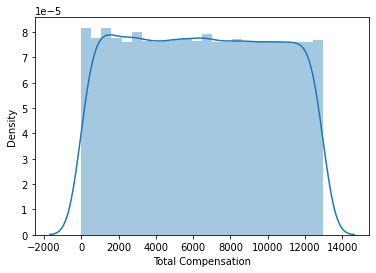

In [53]:
sns.distplot(df['Total Compensation'])
plt.show()

In [54]:
print("Skewness: %f" % df['Total Compensation'].skew())
print("Kurtosis: %f" % df['Total Compensation'].kurt())

Skewness: 0.013099
Kurtosis: -1.202190


In [55]:
df.columns

Index(['Year Type', 'Year', 'Organization Group', 'Department', 'Union',
       'Job Family', 'Job', 'Salaries', 'Overtime', 'Other Salaries',
       'Retirement', 'Health and Dental', 'Other Benefits',
       'Total Compensation'],
      dtype='object')

In [56]:
# Importing K-Means cluster algorithm
from sklearn.cluster import KMeans

In [57]:
kmeans=KMeans(n_clusters=3)

In [58]:
df1 = (df.drop(['Year Type', 'Year', 'Organization Group', 'Department', 'Union', 'Job Family', 'Overtime', 'Other Salaries', 'Retirement', 'Health and Dental', 'Other Benefits'],axis=1))

In [59]:
df1

,Job,Salaries,Total Compensation
0,274,3005,3373
1,276,3014,3043
2,294,3398,4017
3,280,6316,6621
4,290,384,557
...,...,...,...
197683,345,8917,12947
535421,345,8917,12947
577950,345,8917,12947
542571,258,8917,12947


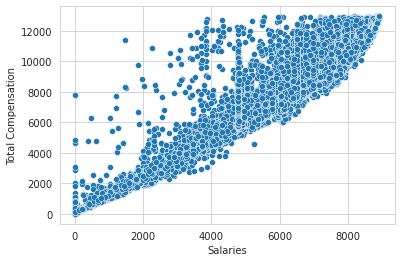

In [82]:
sns.set_style("whitegrid")
sns.scatterplot(x=df1['Salaries'], y=df1['Total Compensation'])
plt.show()


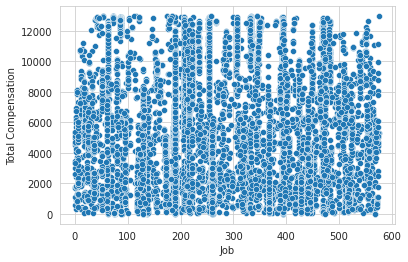

In [83]:
sns.set_style("whitegrid")
sns.scatterplot(x=df1['Job'], y=df1['Total Compensation'])
plt.show()

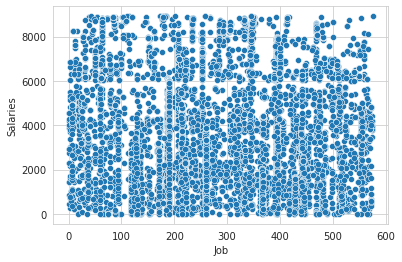

In [86]:
sns.set_style("whitegrid")
sns.scatterplot(x=df1['Job'], y=df1['Salaries'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


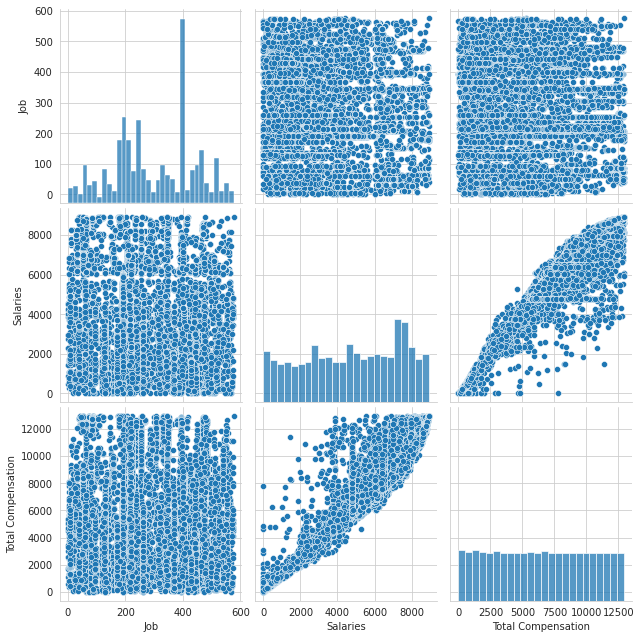

In [87]:
sns.set_style("whitegrid");
sns.pairplot(df1, size=3);
plt.show()


In [88]:
kmeans.fit(df1)

KMeans(n_clusters=3)

In [61]:
print(kmeans.cluster_centers_)

[[  285.61317254  4806.30194805  6163.5869666 ]
 [  302.73259291  7486.74327211 10597.43293464]
 [  304.35376112  1621.41600577  1993.06440759]]


In [62]:
y=kmeans.predict(df1)

In [63]:
y=kmeans.labels_
y

array([2, 2, 0, ..., 1, 1, 1], dtype=int32)

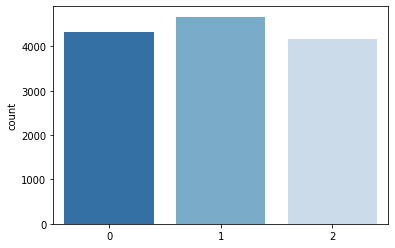

In [64]:
sns.countplot(x=kmeans.labels_, palette='Blues_r')
plt.show()

In [65]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [66]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X= df1
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [67]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 4001.784724297001
2 : 2054.3137655124265
3 : 1425.8269619615003
4 : 1123.750539549327
5 : 952.6729958767459
6 : 829.4211189221671
7 : 760.0313642411065
8 : 693.6996621559633
9 : 665.4021329893081


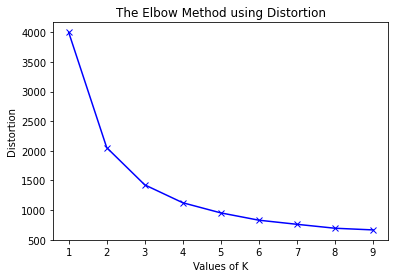

In [68]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

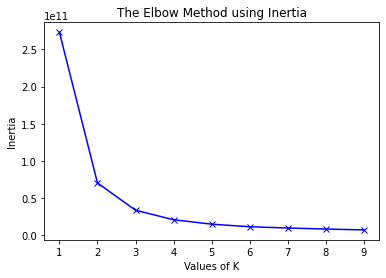

In [69]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [70]:
# Confirming the K value as 3 from elbow method.
kmeans=KMeans(n_clusters=3)

In [71]:
kmeans.fit(df1)

KMeans(n_clusters=3)

In [72]:
print(kmeans.cluster_centers_)

[[  302.91827129  7488.95699615 10601.29353872]
 [  304.32180596  1622.64457253  1994.496878  ]
 [  285.46166319  4809.90062543  6169.14014362]]


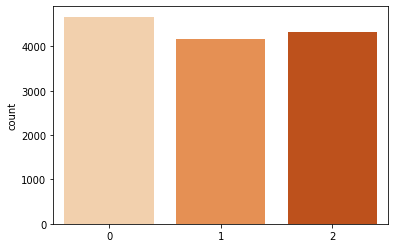

In [73]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

In [89]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_score(X,y)

0.5606289822914413